In [1]:
## import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('KAG_conversion_data.csv')

DATA EXPLORATION AND PREPROCESSING

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.shape

(1143, 11)

In [6]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

There is no missing values in data

DATA ANALYSIS

In [8]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

There are three different campain ids replace them with a,b,c

In [9]:
df['xyz_campaign_id'].replace({916:'a',936:'b',1178:'c',},inplace=True)

In [10]:
df['xyz_campaign_id'].unique()

array(['a', 'b', 'c'], dtype=object)

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='count'>

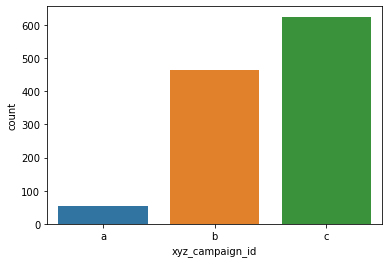

In [11]:
sns.countplot(x='xyz_campaign_id',data=df)

From the above graph we can observe that most of the ads are shown by c campaign

AGE COLUMN

In [12]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

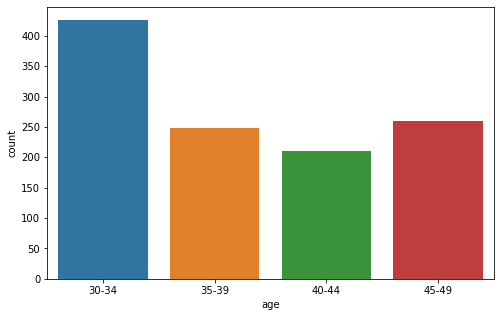

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='age',data=df)
plt.show()

From the above graph we can see most of the people age is between 30-34

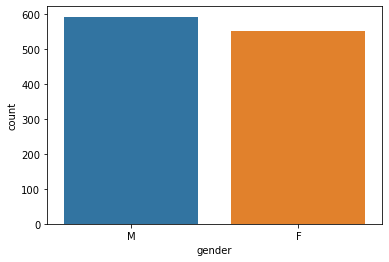

In [14]:
sns.countplot(x='gender',data=df)
plt.show()

Correlation Map

<AxesSubplot:>

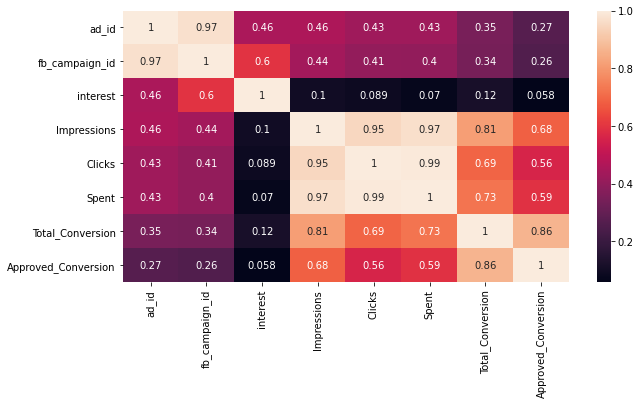

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

From the above graph we can observe that for the target variable total conversions and impressions are highly correlated.

Bivariate Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   object 
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 98.4+ KB


Campaignid vs approved_conversion

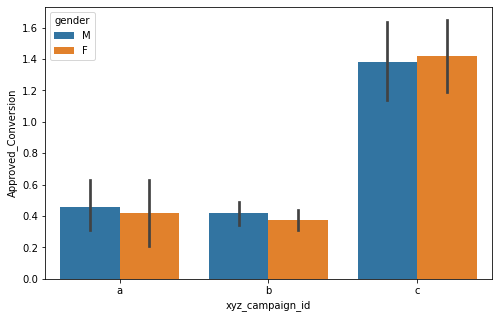

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='xyz_campaign_id',y='Approved_Conversion',hue='gender',data=df)
plt.show()

From the above graph we can observe that for campaign c has more approved conversions.females and males ratio are almost same in every campaign.

Age vs Approved conversion

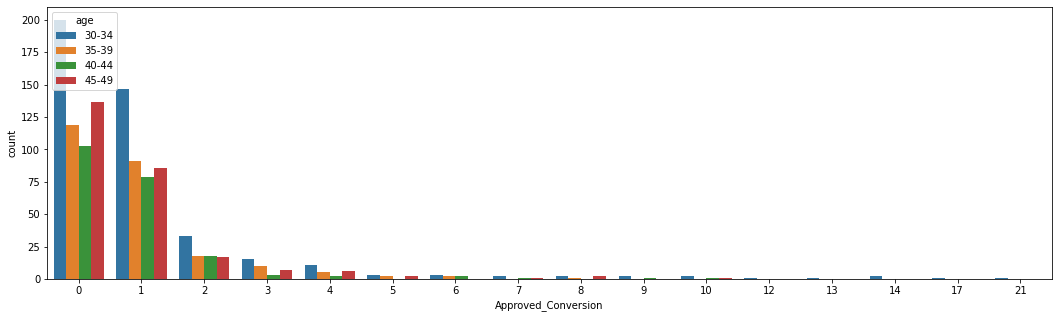

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(hue='age',x='Approved_Conversion',data=df)
plt.show()

From the above graph we can see that no of people who bought the product after seeing the ad are very less. 

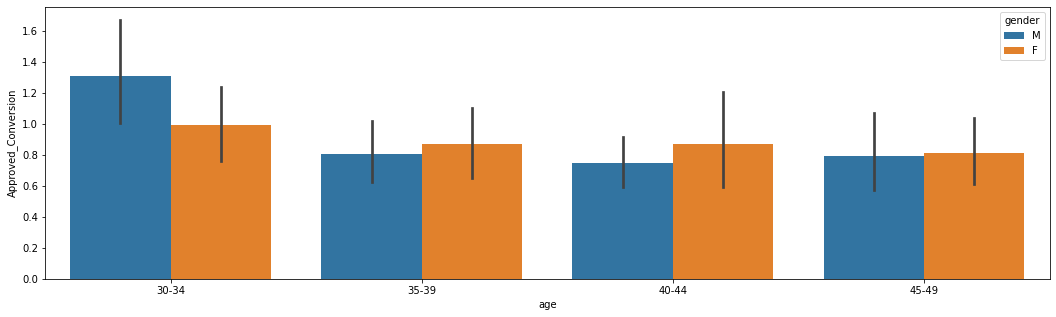

In [19]:
plt.figure(figsize=(18,5))
sns.barplot(x='age',y='Approved_Conversion',hue='gender',data=df)
plt.show()

From the above graph we can observe that 30-34 age people buy more products. except age 30-34 in remaining age peoples females buy more products than males

Gender vs approved conversion

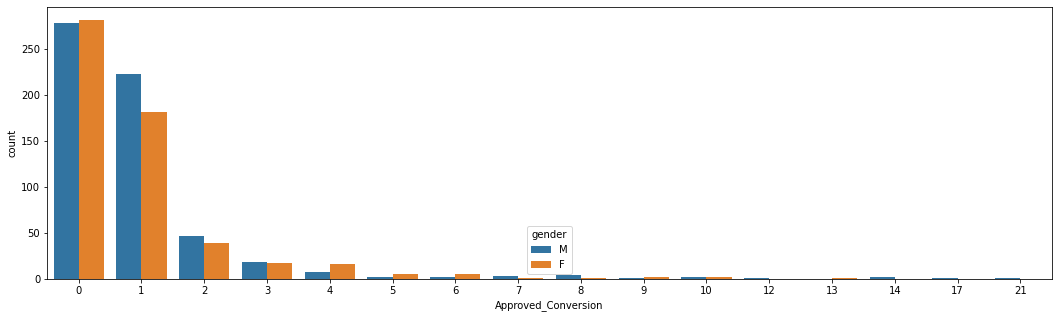

In [20]:
plt.figure(figsize=(18,5))
sns.countplot(hue='gender',x='Approved_Conversion',data=df)
plt.show()

From the above graph we can see that female count is less who bought the product after seeing the ad. 

Impressions Vs approved conversion

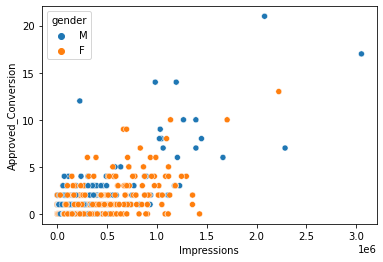

In [21]:
sns.scatterplot(x='Impressions',y='Approved_Conversion',hue='gender',data=df)
plt.show()

From the above graph we observe that if impressions are high approved conversions also high

spent Vs approved conversion

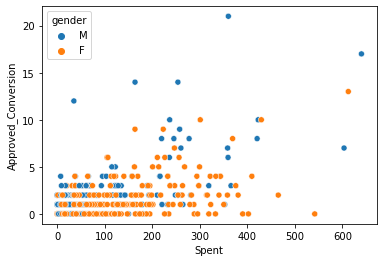

In [22]:
sns.scatterplot(x='Spent',y='Approved_Conversion',hue='gender',data=df)
plt.show()

From the above graph we observe that if amount spent is high approved conversions also high.males spent more amout than females

clicks vs Impressions

<AxesSubplot:xlabel='Impressions', ylabel='Clicks'>

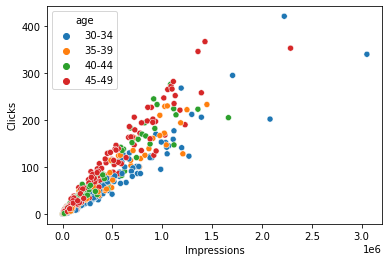

In [42]:
sns.scatterplot(x = 'Impressions' ,y='Clicks', hue='age', data=df)

Clicks Vs approved conversion

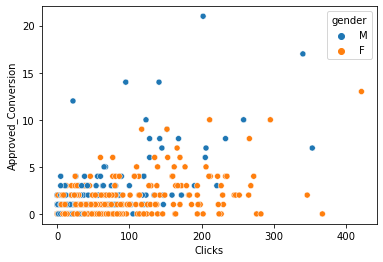

In [23]:
sns.scatterplot(x='Clicks',y='Approved_Conversion',hue='gender',data=df)
plt.show()

From the above graph we observe that if clicks are high approved conversions also high. males click the add more than females.

Total conversions Vs approved conversion

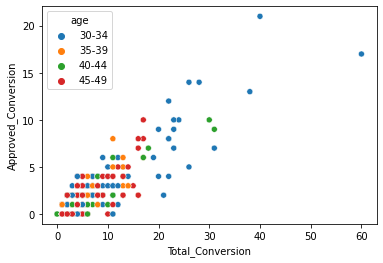

In [24]:
sns.scatterplot(x='Total_Conversion',y='Approved_Conversion',hue='age',data=df)
plt.show()

From the above graph we observe that if if total conversions are high approved conversions also high.Total conversions is higly correlated with approved conversion. age 30-34 people would like to buy more products

<AxesSubplot:xlabel='age', ylabel='count'>

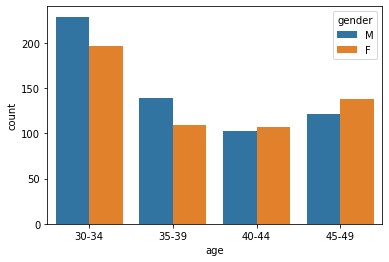

In [25]:
# Age vs Gender

sns.countplot(x='age',hue='gender',data=df)

From the above graph we can see that female count is less

FEATURE ENGINEERING

In [26]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
#categorical variables
train= pd.get_dummies(train, columns=['age', 'gender','xyz_campaign_id'])
test = pd.get_dummies(test, columns=['age', 'gender','xyz_campaign_id'])

In [28]:
#numerical variables

from sklearn.preprocessing import StandardScaler

numerical_cols = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

Model Development

In [29]:
X_train = train.drop(['Approved_Conversion'], axis=1)
y_train = train['Approved_Conversion']
X_test = test.drop(['Approved_Conversion'], axis=1)
y_test = test['Approved_Conversion']

#### linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test).round().astype(int)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2*100)

Mean squared error: 0.3341440836874838
Root mean squared error: 0.5780519731715166
R-squared score: 69.9689594749446


from the above results we can observe it gives accuracy of 69%

#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Accuracy

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2*100)

Mean squared error: 0.5195220838285775
Root mean squared error: 0.7207788036759804
R-squared score: 53.30819992099821


RandomForest regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Accuracy

In [41]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2*100)

Mean squared error: 0.3420998157574996
Root mean squared error: 0.5848929951345798
R-squared score: 69.25394184074169
